In [1]:
from GlucoCheck.glucoCheck import glucoCheckOps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
glucoCheckObject = glucoCheckOps()

Using TensorFlow backend.


In [2]:
data = glucoCheckObject.hallData
data['Display Time'] = pd.to_datetime(data['Display Time']) # Ensures that displayTime column 
# is converted to datetime format.
data['GlucoseValue'] = pd.to_numeric(data['GlucoseValue'])# Ensures that gluvoseValue is numeric
data.head() # this allows you to peek at loaded data; or type just data to see first and last portion of your dataset

,subjectId,Display Time,GlucoseValue
0,1636-69-001,2014-02-03 03:42:00,93
1,1636-69-001,2014-02-03 03:47:00,93
2,1636-69-001,2014-02-03 03:52:00,93
3,1636-69-001,2014-02-03 03:57:00,95
4,1636-69-001,2014-02-03 04:02:00,96


In [3]:
meta = glucoCheckObject.metadata
meta

,ID,status
0,ID01,diabetic
1,ID02,diabetic
2,ID03,diabetic
3,ID11,diabetic
4,ID12,diabetic
...,...,...
84,OD552,NAN
85,OD567,NAN
86,OD584,NAN
87,OD596,NAN


In [4]:
ids = data['subjectId'].unique()
ids

array(['1636-69-001', '1636-69-026', '1636-69-028', '1636-69-032',
       '1636-69-035', '1636-69-048', '1636-69-053', '1636-69-060',
       '1636-69-064', '1636-69-069', '1636-69-090', '1636-69-091',
       '1636-69-100', '1636-69-104', '1636-69-107', '1636-69-111',
       '1636-69-114', '1636-69-123', '1636-70-1002', '1636-70-1003',
       '1636-70-1005', '1636-70-1008', '1636-70-1010', '2133-001',
       '2133-002', '2133-003', '2133-004', '2133-006', '2133-007',
       '2133-008', '2133-009', '2133-010', '2133-011', '2133-012',
       '2133-013', '2133-015', '2133-017', '2133-018', '2133-019',
       '2133-020', '2133-021', '2133-022', '2133-023', '2133-024',
       '2133-025', '2133-026', '2133-027', '2133-028', '2133-030',
       '2133-032', '2133-033', '2133-035', '2133-036', '2133-037',
       '2133-039', '2133-040', '2133-041'], dtype=object)

In [5]:
meta = meta[meta['ID'].isin(ids)]


In [28]:
diabetic = pd.DataFrame()
nondiabetic = pd.DataFrame()
prediabetic = pd.DataFrame()

In [29]:
for subjectId, df in data.groupby('subjectId'):
    df = df.reset_index()
    xx = meta[meta['ID'] == subjectId]
    xx['status'] = xx['status'].astype('str')
    status = xx['status'].values[0]
    if status == 'diabetic':
        diabetic[subjectId] = df['GlucoseValue']
    elif status == 'non-diabetic':
        nondiabetic[subjectId] = df['GlucoseValue']
    elif status == 'pre-diabetic':
        prediabetic[subjectId] = df['GlucoseValue']
    

In [86]:
diabetic = diabetic.replace(0, np.nan)
d_mean = diabetic.mean(axis=1, skipna=True)
diabetic

,1636-69-001,1636-69-091,2133-004,2133-018,2133-039
0,93,126.0,142.0,118.0,129
1,93,120.0,142.0,117.0,111
2,93,112.0,137.0,120.0,105
3,95,111.0,135.0,123.0,102
4,96,109.0,132.0,126.0,99
...,...,...,...,...,...
1841,115,NaN,NaN,NaN,149
1842,114,NaN,NaN,NaN,145
1843,117,NaN,NaN,NaN,142
1844,121,NaN,NaN,NaN,139


In [89]:
nondiabetic = nondiabetic.replace(0, np.nan)
n_mean = nondiabetic.mean(axis=1, skipna=True)
nondiabetic

,1636-69-028,1636-69-035,1636-69-048,1636-69-053,1636-69-060,1636-69-064,1636-69-069,1636-69-100,1636-69-104,1636-69-107,...,2133-023,2133-025,2133-026,2133-028,2133-030,2133-032,2133-033,2133-037,2133-040,2133-041
0,129,112,90.0,65,121.0,93.0,132,107,97,101,...,95.0,159,73.0,77,97.0,125.0,150,64.0,73.0,143
1,131,110,88.0,65,108.0,86.0,139,107,93,101,...,93.0,168,75.0,77,98.0,126.0,159,74.0,78.0,141
2,132,105,87.0,55,112.0,90.0,145,105,90,101,...,92.0,149,76.0,77,99.0,125.0,161,78.0,91.0,134
3,137,104,87.0,51,121.0,86.0,139,103,86,103,...,92.0,155,78.0,78,100.0,125.0,161,90.0,108.0,124
4,133,104,88.0,43,121.0,94.0,136,92,84,103,...,91.0,159,77.0,78,102.0,120.0,154,85.0,107.0,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,93,99,NaN,100,127.0,NaN,103,92,84,147,...,94.0,89,NaN,82,95.0,NaN,104,NaN,NaN,60
1818,94,99,NaN,99,128.0,NaN,104,97,83,142,...,95.0,88,NaN,82,NaN,NaN,105,NaN,NaN,60
1819,90,100,NaN,98,128.0,NaN,105,101,80,139,...,94.0,89,NaN,82,NaN,NaN,104,NaN,NaN,59
1820,87,100,NaN,97,126.0,NaN,115,96,80,140,...,92.0,89,NaN,80,NaN,NaN,102,NaN,NaN,58


In [90]:
prediabetic = prediabetic.replace(0, np.nan)
p_mean = prediabetic.mean(axis=1, skipna=True)
prediabetic

,1636-69-026,1636-69-032,1636-69-090,1636-69-114,1636-70-1005,1636-70-1010,2133-015,2133-017,2133-019,2133-021,2133-024,2133-027,2133-035,2133-036
0,123,122.0,79,148,179,101,106,131,120,115,96,87,93,150
1,122,123.0,75,147,184,99,110,127,121,117,95,85,92,153
2,119,124.0,72,148,182,91,111,124,124,119,87,77,93,155
3,114,128.0,75,147,164,84,114,123,123,123,94,77,95,157
4,111,133.0,80,148,163,78,111,122,115,122,94,78,101,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1791,86,NaN,96,114,128,98,109,129,77,146,118,61,95,133
1792,82,NaN,95,115,138,96,109,127,82,141,117,62,95,139
1793,82,NaN,94,116,154,95,109,125,84,140,116,62,96,150
1794,83,NaN,94,95,166,94,108,122,82,140,111,62,97,148


Text(0.5, 1.0, 'Diabetic Individuals')

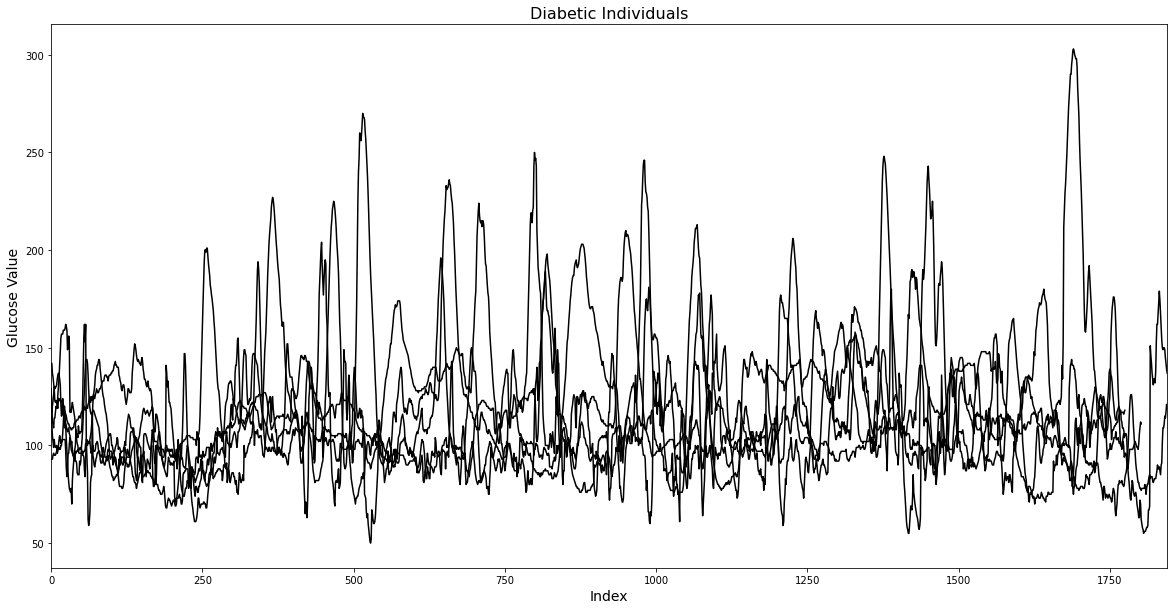

In [42]:
lines = diabetic.plot.line(figsize=(20,10, ), legend=None, color=['black'])
plt.xlabel('Index', fontsize=14)
plt.ylabel('Glucose Value', fontsize=14)
plt.title("Diabetic Individuals", fontsize=16)


Text(0.5, 1.0, 'Prediabetic Individuals')

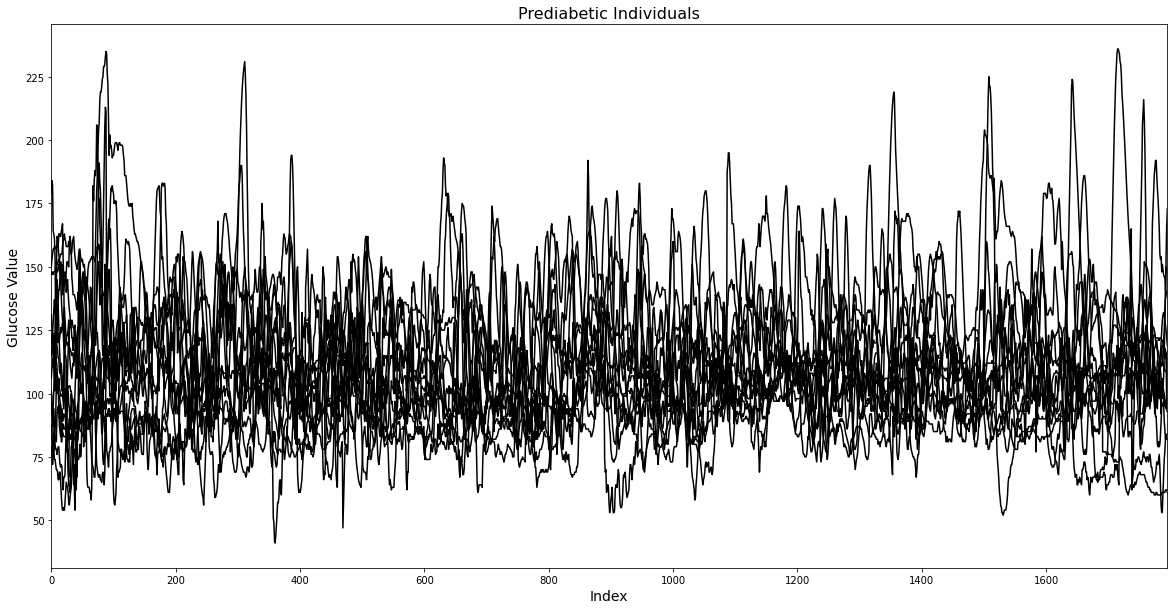

In [43]:
lines = prediabetic.plot.line(figsize=(20,10), legend=None, color=['black'])
plt.xlabel('Index', fontsize=14)
plt.ylabel('Glucose Value', fontsize=14)
plt.title("Prediabetic Individuals", fontsize=16)

Text(0.5, 1.0, 'Nondiabetic Individuals')

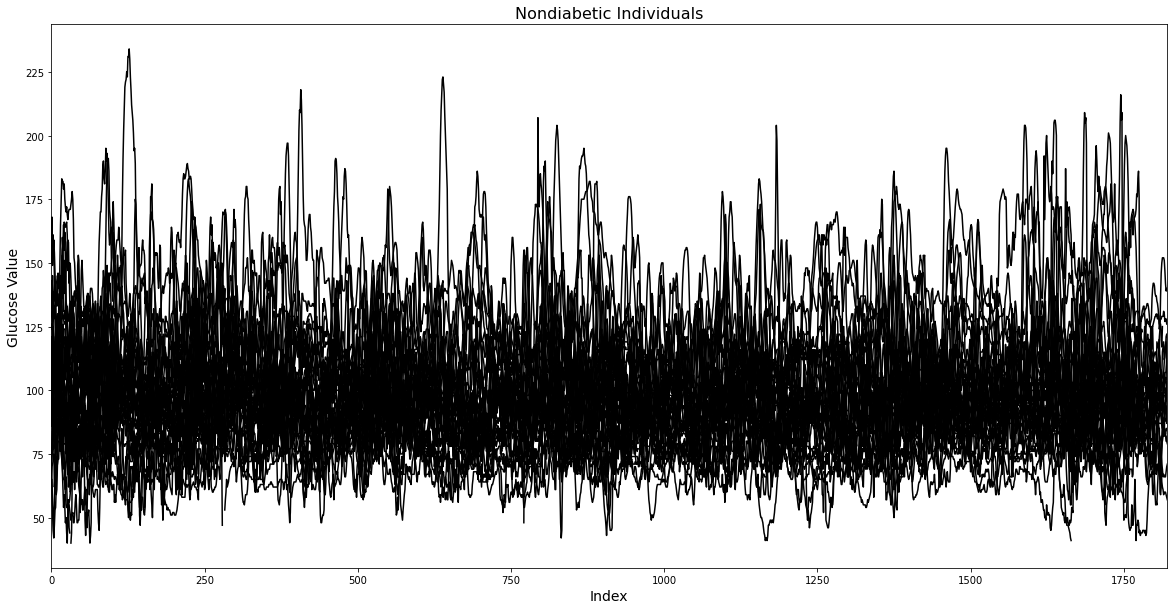

In [44]:
lines = nondiabetic.plot.line(figsize=(20,10),legend=None, color=['black'])
plt.xlabel('Index', fontsize=14)
plt.ylabel('Glucose Value', fontsize=14)
plt.title("Nondiabetic Individuals", fontsize=16)


Text(0, 0.5, 'Glucose Values')

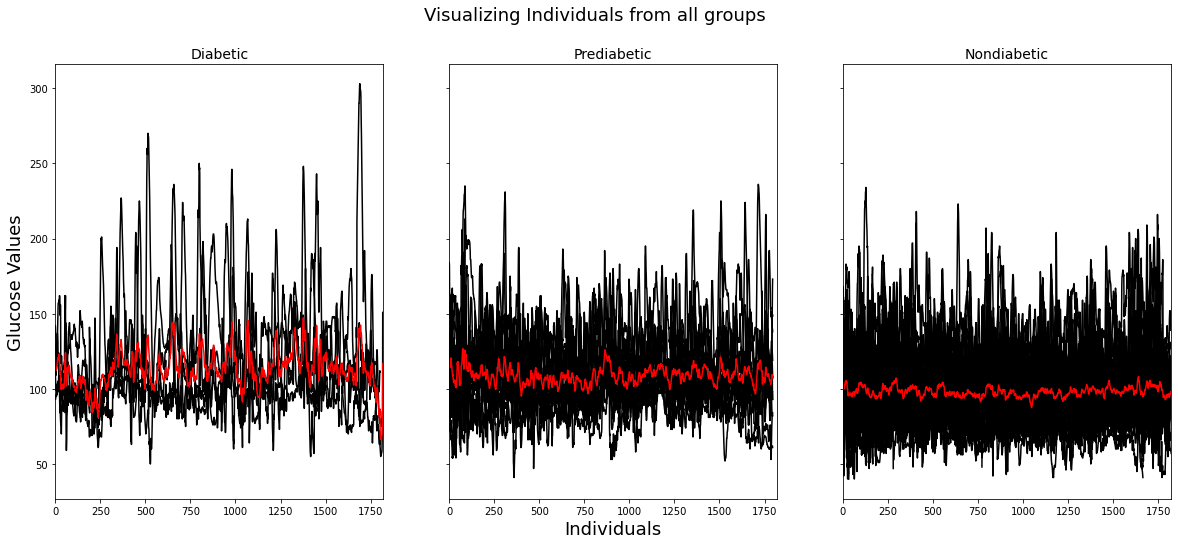

In [92]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3,figsize=(20,8),sharex=True,sharey=True)

diabetic.plot.line(legend=None, color=['black'], ax=ax1)
d_mean.plot.line(legend=None, color=['red'], ax=ax1)

prediabetic.plot.line(legend=None, color=['black'], ax=ax2)
p_mean.plot.line(legend=None, color=['red'], ax=ax2)

nondiabetic.plot.line(legend=None, color=['black'], ax=ax3)
n_mean.plot.line(legend=None, color=['red'], ax=ax3)

# plt.tight_layout()
fig.suptitle('Visualizing Individuals from all groups', fontsize=18)

ax1.set_title("Diabetic", fontsize=14)
ax2.set_title("Prediabetic", fontsize=14)
ax3.set_title("Nondiabetic", fontsize=14)

ax2.set_xlabel("Individuals", fontsize=18)
ax1.set_ylabel("Glucose Values", fontsize=18)


In [81]:
QC_table = glucoCheckObject.dataDescribe(data)
QC_table.head()

,Subject ID,Start,End,# of readings,# of days,Timestamp days,# of missing values,% of missing values,Avg gap size,Max gv,Min gv,Mean gv
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,8.08,8 days 02:04:00,490,21.04,28.82,204,51,108.56
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,6.42,6 days 10:40:00,100,5.39,2.94,171,59,92.59
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,9.04,9 days 01:29:00,733,28.09,5.51,204,50,103.92
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,6.29,6 days 07:34:00,57,3.13,2.71,153,48,92.97
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,8.62,8 days 15:00:00,651,26.21,5.47,214,58,107.53


In [82]:
QC_table

,Subject ID,Start,End,# of readings,# of days,Timestamp days,# of missing values,% of missing values,Avg gap size,Max gv,Min gv,Mean gv
0,2133-041,2017-07-03 18:32:00,2017-07-11 20:41:00,1858,8.08,8 days 02:04:00,490,21.04,28.82,204,51,108.56
1,2133-040,2017-06-28 13:34:00,2017-07-05 00:19:00,1792,6.42,6 days 10:40:00,100,5.39,2.94,171,59,92.59
2,2133-039,2017-06-05 12:23:00,2017-06-14 13:57:00,2013,9.04,9 days 01:29:00,733,28.09,5.51,204,50,103.92
3,2133-037,2017-06-05 14:11:00,2017-06-11 21:50:00,1785,6.29,6 days 07:34:00,57,3.13,2.71,153,48,92.97
4,2133-036,2017-06-01 15:26:00,2017-06-10 06:31:00,1954,8.62,8 days 15:00:00,651,26.21,5.47,214,58,107.53
5,2133-035,2017-06-01 17:17:00,2017-06-08 23:06:00,1830,7.21,7 days 05:44:00,327,15.68,4.81,190,47,101.77
6,2133-033,2017-05-19 12:58:00,2017-05-26 20:02:00,1892,7.25,7 days 06:59:00,237,11.29,8.78,161,49,92.98
7,2133-032,2017-05-19 13:31:00,2017-05-25 18:05:00,1781,6.17,6 days 04:29:00,8,0.45,1.60,147,69,99.48
8,2133-030,2017-05-03 14:13:00,2017-05-10 08:57:00,1818,6.75,6 days 18:39:00,144,7.38,18.00,147,41,93.20
9,2133-028,2017-05-10 00:03:00,2017-05-17 02:08:00,1850,7.08,7 days 02:00:00,195,9.56,65.00,111,45,74.79


In [23]:
QC_table[QC_table['Subject ID']=='1636-69-104']

,Subject ID,Start,End,# of readings,# of days,Timestamp days,# of missing values,% of missing values,Avg gap size,Max gv,Min gv,Mean gv
43,1636-69-104,2015-08-05 14:46:00,2016-02-23 09:10:00,2361,201.75,201 days 18:19:00,55925,96.24,317.76,152,46,89.69


In [5]:
# LSTM Imputation
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LSTM.csv')
LSTM_imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 50; We use LSTM imputations
Training Model...

Model trained successfully!
Imputation Successful


In [6]:
# Linear Imputation
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LINEAR.csv')
Linear_imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 5; We use the linear imputations
Imputation Successful


In [7]:
# Spline Imputation
dataWithMissing = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_SPLINE.csv')
Spline_imputed = glucoCheckObject.impute(dataWithMissing)

Gap < 15; We use the spline imputations
Imputation Successful


In [8]:
LSTM_Original = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LSTM.csv')
Linear_Original = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_LINEAR.csv')
Spline_Original = pd.read_csv('~/Desktop/NCSA_genomics/Python Files/Files/testfile_SPLINE.csv')


## TRACE PLOTS

In [9]:
# FOR LSTM

In [10]:
df = pd.DataFrame()
df['Time'] = LSTM_Original['Display Time']
df['Time'] = df['Time'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M'))
df['Original'] = LSTM_Original['GlucoseValue']
df['LSTM'] = LSTM_imputed['GlucoseValue']
df = df.set_index(['Time'], drop=True)
O = df.Original
A = df.Original.ewm(alpha=0.05, adjust=False, ignore_na=True).mean()
A[O.isnull()] = np.nan
A = A.round()
df['Smooth'] = A

Text(0, 0.5, 'Glucose Value')

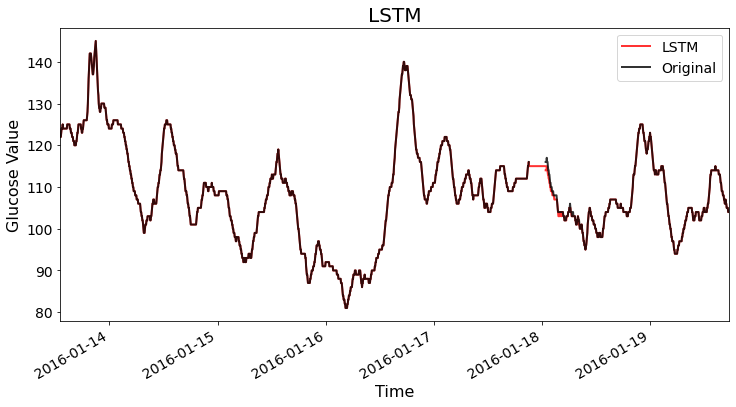

In [11]:
colors = ['red', 'black']


df[['LSTM','Smooth']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['LSTM','Original'], fontsize=14)

# title and labels
plt.title('LSTM', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

In [12]:
# FOR LINEAR

In [13]:
df = pd.DataFrame()
df['Time'] = Linear_Original['Display Time']
df['Time'] = df['Time'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M'))
df['Original'] = Linear_Original['GlucoseValue']
df['Linear'] = Linear_imputed['GlucoseValue']
df = df.set_index(['Time'], drop=True)

Text(0, 0.5, 'Glucose Value')

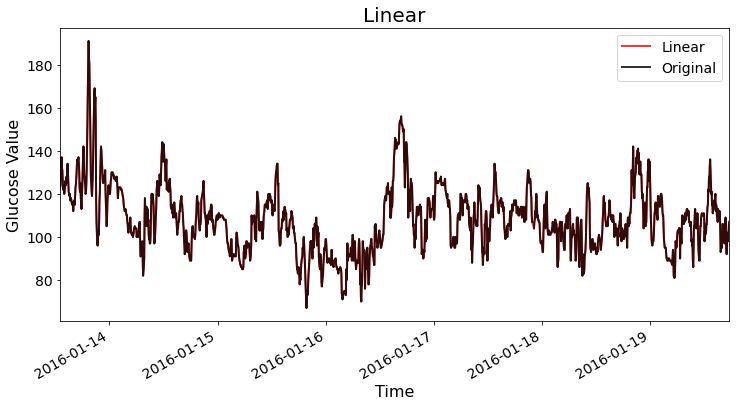

In [14]:
colors = ['red', 'black']


df[['Linear','Original']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Linear','Original'], fontsize=14)

# title and labels
plt.title('Linear', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

In [15]:
# FOR SPLINE

In [16]:
df = pd.DataFrame()
df['Time'] = Spline_Original['Display Time']
df['Time'] = df['Time'].apply(lambda x: pd.datetime.strptime(x, '%m/%d/%y %H:%M'))
df['Original'] = Spline_Original['GlucoseValue']
df['Spline'] = Spline_imputed['GlucoseValue']
df = df.set_index(['Time'], drop=True)

Text(0, 0.5, 'Glucose Value')

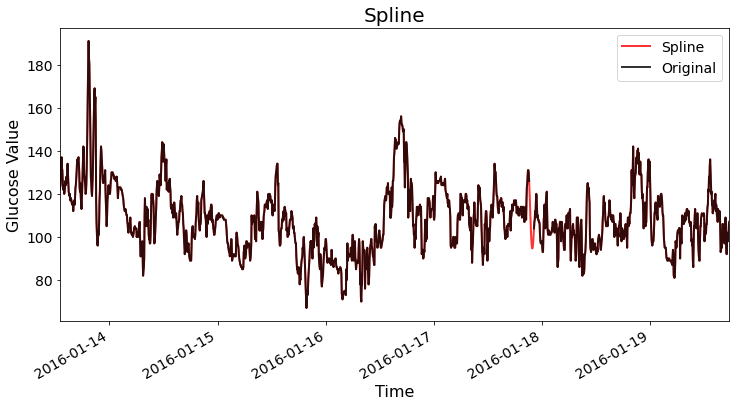

In [17]:
colors = ['red', 'black']


df[['Spline','Original']].plot(color=colors, linewidth=2, figsize=(12,6), alpha=0.8)

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Spline','Original'], fontsize=14)

# title and labels
plt.title('Spline', fontsize=20)
plt.xlabel('Time', fontsize=16)
plt.ylabel('Glucose Value', fontsize=16)

## HISTOGRAMS

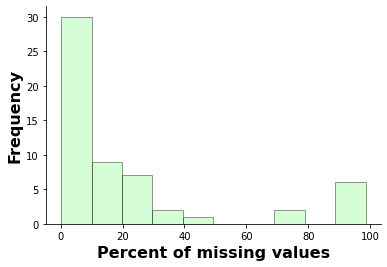

In [18]:
glucoCheckObject.histograms(QC_table, '% of missing values',1)

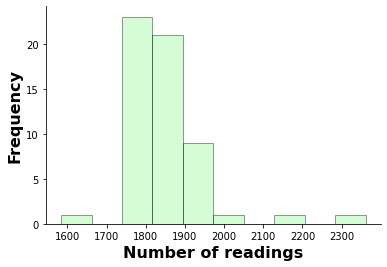

In [19]:
# of readings
glucoCheckObject.histograms(QC_table, '# of readings',1)

## Trace Plot


Displaying for all days 


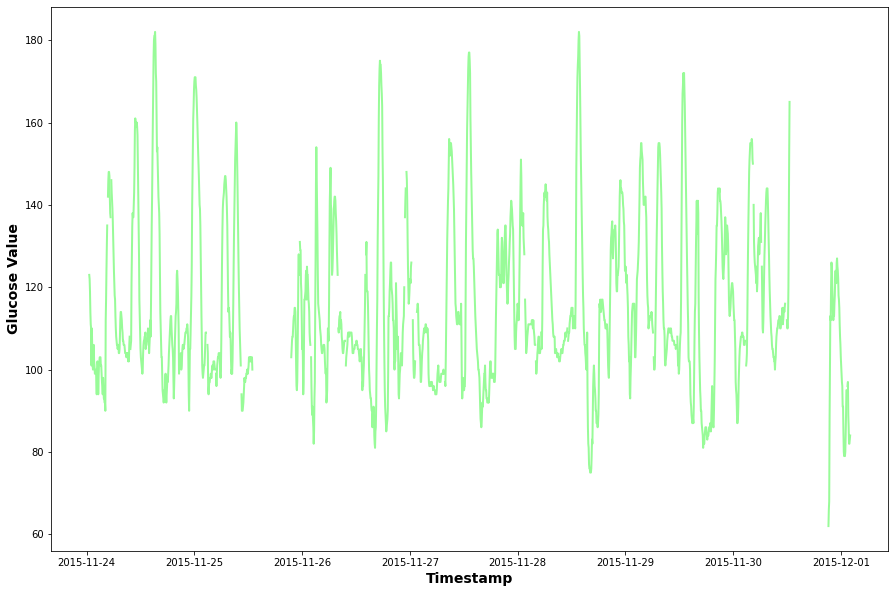

In [20]:
glucoCheckObject.plotIndividual('1636-69-026',data)

Displaying for day: 2015-11-27


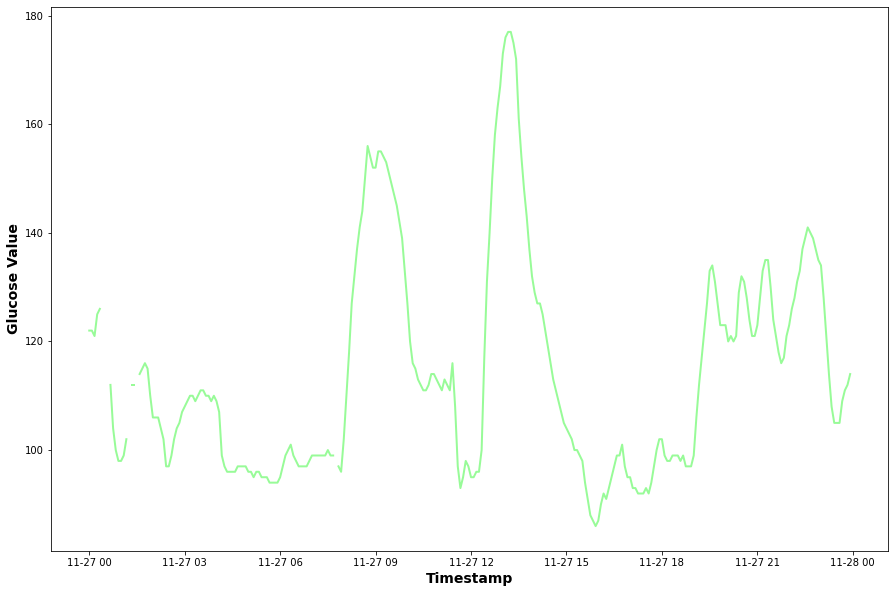

In [21]:
glucoCheckObject.plotIndividual('1636-69-026', data, '2015-11-27')

## Confusion Matrix

Confusion Matrix:



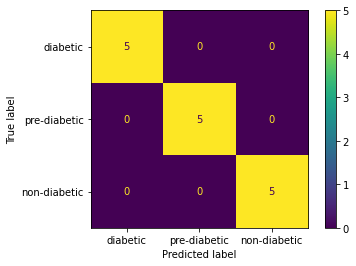

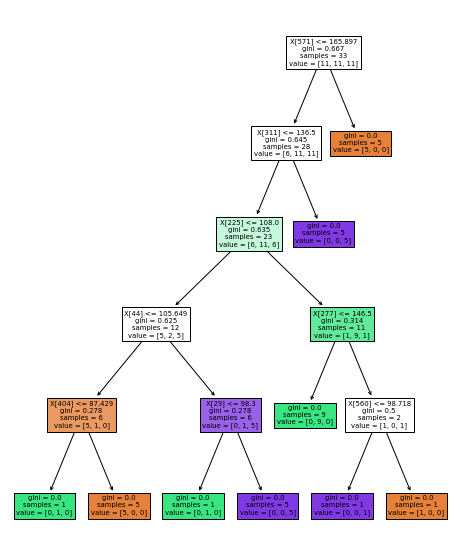

In [22]:
label = glucoCheckObject.classifier(LSTM_imputed,1,1)